In [48]:
# Install Libraries
#!pip install textblob
#!pip install tweepy
#!pip install pycountry
#!pip install langdetect

In [8]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# Authentication
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [10]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Trump
Please enter how many tweets to analyze: 10


In [11]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  10
positive number:  6
negative number:  4
neutral number:  0


In [12]:
tweet_list

,0
0,RT @aaronjmate: @EmmaVigeland Jimmy called for...
1,RT @RepMattGaetz: President Trump called for p...
2,"RT @Paroledipaola: ""C'è tuttora una campagna s..."
3,RT @ThePubliusUSA: Ivanka Trump and Jared Kush...
4,RT @CapitanBitcoin: Trump ha desclasificado an...
5,RT @opropriolavo: O mais lindo é que NINGUÉM l...
6,RT @TaxReformExpert: Thank you President Trump...
7,RT @joncoopertweets: HHS Secretary Azar has re...
8,@alocinotasor Yesterday or the day before ... ...
9,RT @pintoj68: Donald Trump's approval rating g...


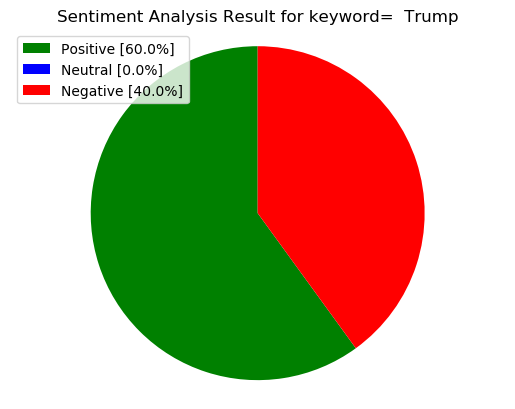

In [49]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [15]:
tweet_list.drop_duplicates(inplace = True)


Extracting text values

text_all = tweet_list[0].values text_neutral = neutral_list[0].values text_positive = positive_list[0].values text_negative = negative_list[0].values


In [16]:


tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list



,0,text
0,RT @aaronjmate: @EmmaVigeland Jimmy called for...,RT @aaronjmate: @EmmaVigeland Jimmy called for...
1,RT @RepMattGaetz: President Trump called for p...,RT @RepMattGaetz: President Trump called for p...
2,"RT @Paroledipaola: ""C'è tuttora una campagna s...","RT @Paroledipaola: ""C'è tuttora una campagna s..."
3,RT @ThePubliusUSA: Ivanka Trump and Jared Kush...,RT @ThePubliusUSA: Ivanka Trump and Jared Kush...
4,RT @CapitanBitcoin: Trump ha desclasificado an...,RT @CapitanBitcoin: Trump ha desclasificado an...
5,RT @opropriolavo: O mais lindo é que NINGUÉM l...,RT @opropriolavo: O mais lindo é que NINGUÉM l...
6,RT @TaxReformExpert: Thank you President Trump...,RT @TaxReformExpert: Thank you President Trump...
7,RT @joncoopertweets: HHS Secretary Azar has re...,RT @joncoopertweets: HHS Secretary Azar has re...
8,@alocinotasor Yesterday or the day before ... ...,@alocinotasor Yesterday or the day before ... ...
9,RT @pintoj68: Donald Trump's approval rating g...,RT @pintoj68: Donald Trump's approval rating g...


In [17]:
tweet_list

,0,text
0,RT @aaronjmate: @EmmaVigeland Jimmy called for...,RT @aaronjmate: @EmmaVigeland Jimmy called for...
1,RT @RepMattGaetz: President Trump called for p...,RT @RepMattGaetz: President Trump called for p...
2,"RT @Paroledipaola: ""C'è tuttora una campagna s...","RT @Paroledipaola: ""C'è tuttora una campagna s..."
3,RT @ThePubliusUSA: Ivanka Trump and Jared Kush...,RT @ThePubliusUSA: Ivanka Trump and Jared Kush...
4,RT @CapitanBitcoin: Trump ha desclasificado an...,RT @CapitanBitcoin: Trump ha desclasificado an...
5,RT @opropriolavo: O mais lindo é que NINGUÉM l...,RT @opropriolavo: O mais lindo é que NINGUÉM l...
6,RT @TaxReformExpert: Thank you President Trump...,RT @TaxReformExpert: Thank you President Trump...
7,RT @joncoopertweets: HHS Secretary Azar has re...,RT @joncoopertweets: HHS Secretary Azar has re...
8,@alocinotasor Yesterday or the day before ... ...,@alocinotasor Yesterday or the day before ... ...
9,RT @pintoj68: Donald Trump's approval rating g...,RT @pintoj68: Donald Trump's approval rating g...


In [18]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @aaronjmate: @EmmaVigeland Jimmy called for...,jimmy called for pardoning julian assange o...
1,RT @RepMattGaetz: President Trump called for p...,president trump called for protests that woul...
2,"RT @Paroledipaola: ""C'è tuttora una campagna s...",c tuttora una campagna straordinaria di fa...
3,RT @ThePubliusUSA: Ivanka Trump and Jared Kush...,ivanka trump and jared kushner bought a 30 m...
4,RT @CapitanBitcoin: Trump ha desclasificado an...,trump ha desclasificado antes de su asesinato...
5,RT @opropriolavo: O mais lindo é que NINGUÉM l...,o mais lindo que ningu m lembra que a causa...
6,RT @TaxReformExpert: Thank you President Trump...,thank you president trump for 1 best econ...
7,RT @joncoopertweets: HHS Secretary Azar has re...,hhs secretary azar has resigned and admitted...
8,@alocinotasor Yesterday or the day before ... ...,yesterday or the day before gosh but it ...
9,RT @pintoj68: Donald Trump's approval rating g...,donald trump s approval rating goes off a cli...


In [19]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @aaronjmate: @EmmaVigeland Jimmy called for...,jimmy called for pardoning julian assange o...,0.1875,0.4375,positive,0.000,0.856,0.144,0.4019
1,RT @RepMattGaetz: President Trump called for p...,president trump called for protests that woul...,0.2500,0.5000,positive,0.213,0.562,0.225,0.0772
2,"RT @Paroledipaola: ""C'è tuttora una campagna s...",c tuttora una campagna straordinaria di fa...,-0.5000,1.0000,negative,0.171,0.829,0.000,-0.4767
3,RT @ThePubliusUSA: Ivanka Trump and Jared Kush...,ivanka trump and jared kushner bought a 30 m...,0.2500,0.4375,positive,0.000,0.909,0.091,0.2006
4,RT @CapitanBitcoin: Trump ha desclasificado an...,trump ha desclasificado antes de su asesinato...,0.0000,0.0000,positive,0.000,0.888,0.112,0.3400
5,RT @opropriolavo: O mais lindo é que NINGUÉM l...,o mais lindo que ningu m lembra que a causa...,0.0000,0.0000,negative,0.099,0.901,0.000,-0.2960
6,RT @TaxReformExpert: Thank you President Trump...,thank you president trump for 1 best econ...,1.0000,0.3000,positive,0.222,0.403,0.375,0.5859
7,RT @joncoopertweets: HHS Secretary Azar has re...,hhs secretary azar has resigned and admitted...,0.0000,0.0000,negative,0.098,0.833,0.069,-0.1531
8,@alocinotasor Yesterday or the day before ... ...,yesterday or the day before gosh but it ...,0.5000,0.5000,negative,0.153,0.721,0.126,-0.1531
9,RT @pintoj68: Donald Trump's approval rating g...,donald trump s approval rating goes off a cli...,0.0000,0.0000,positive,0.000,0.721,0.279,0.4767


In [20]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [21]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [22]:


#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")



,Total,Percentage
positive,6,60.0
negative,4,40.0


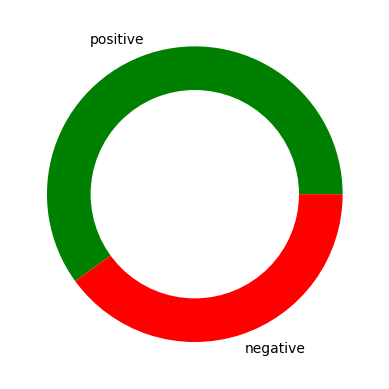

In [57]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','red',"blue"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [29]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


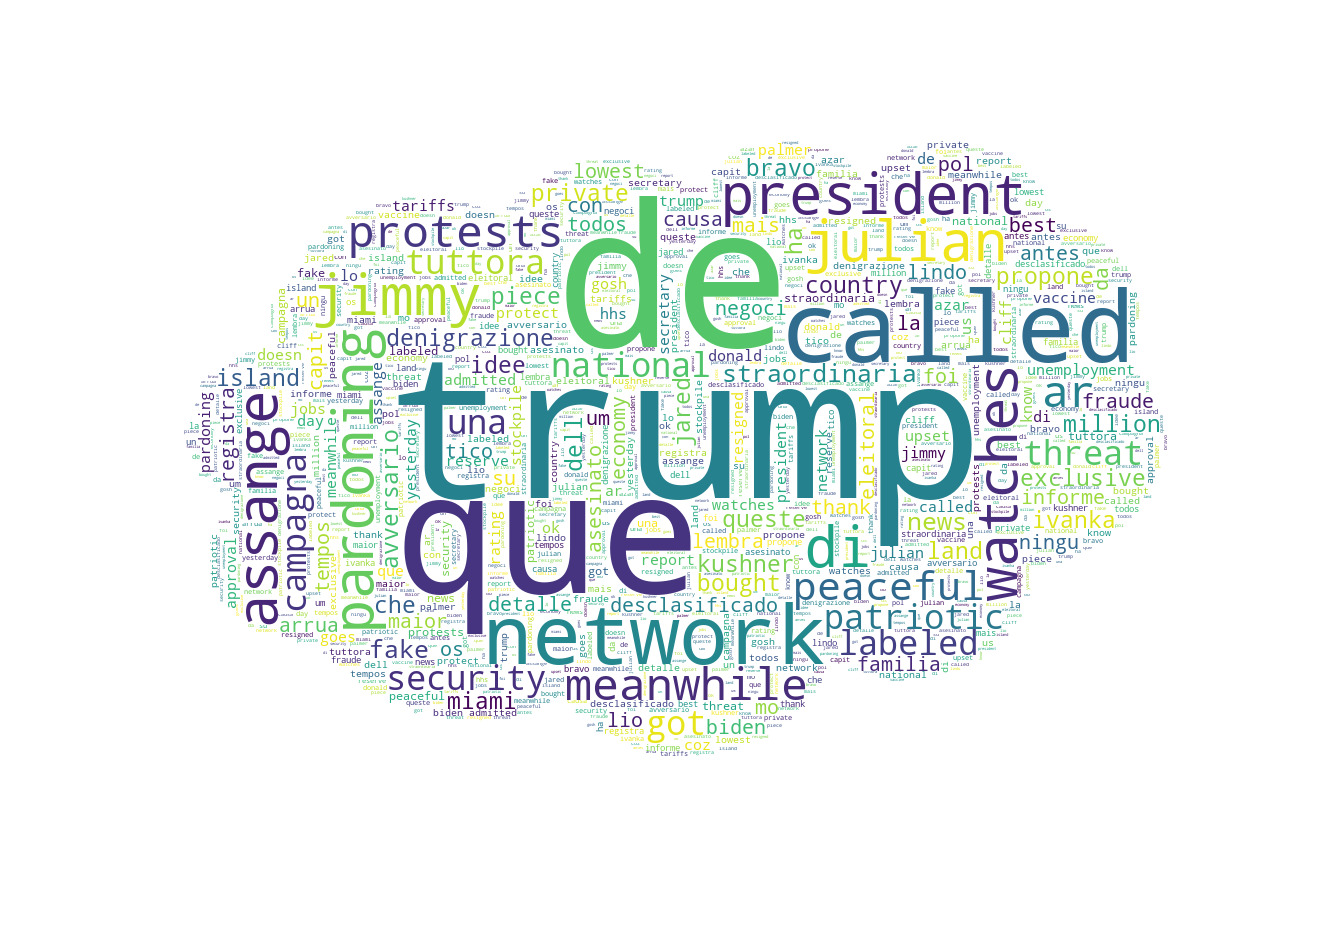

In [30]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


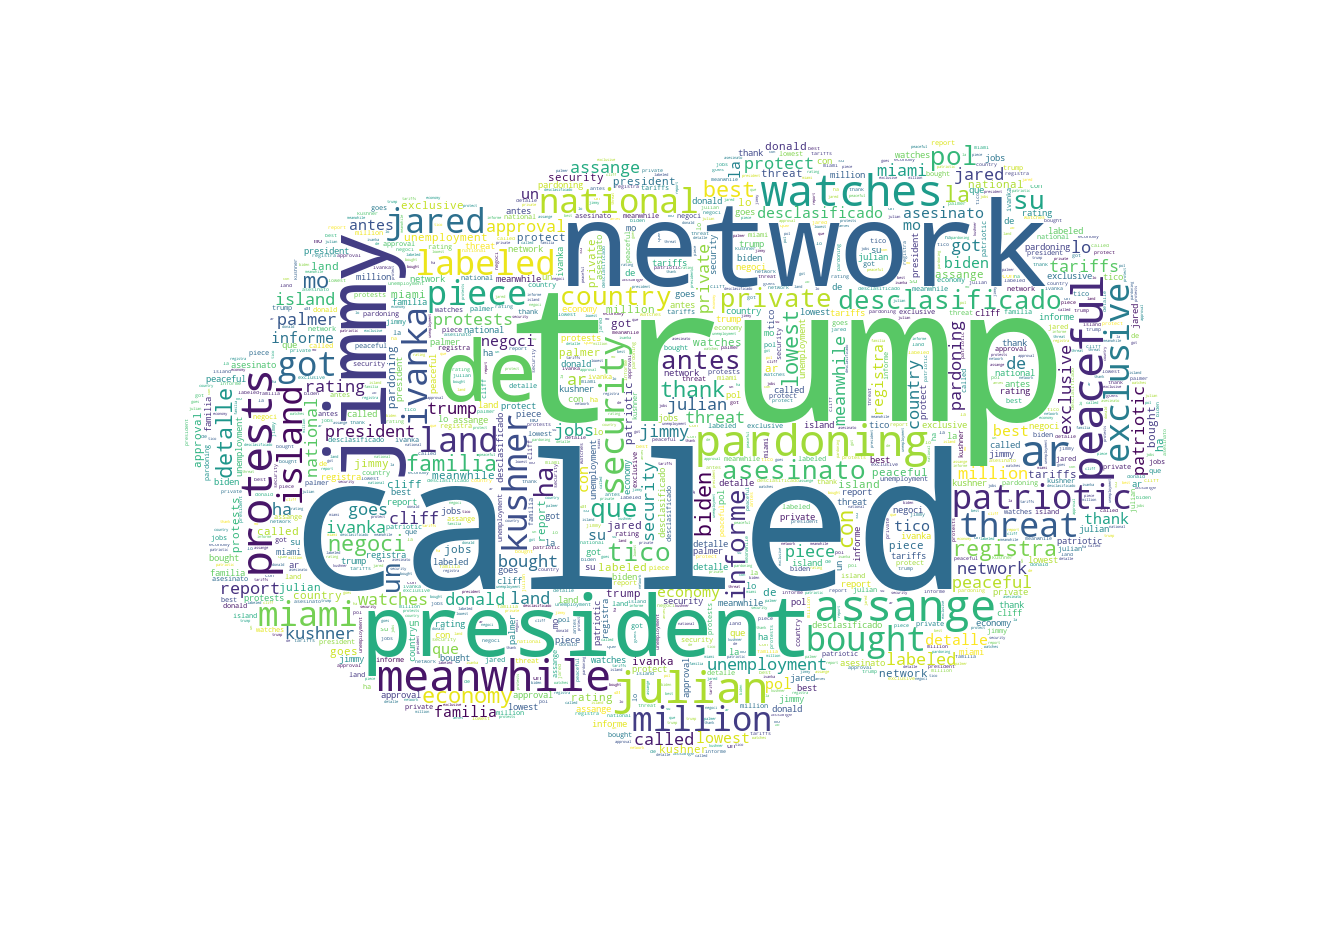

In [31]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


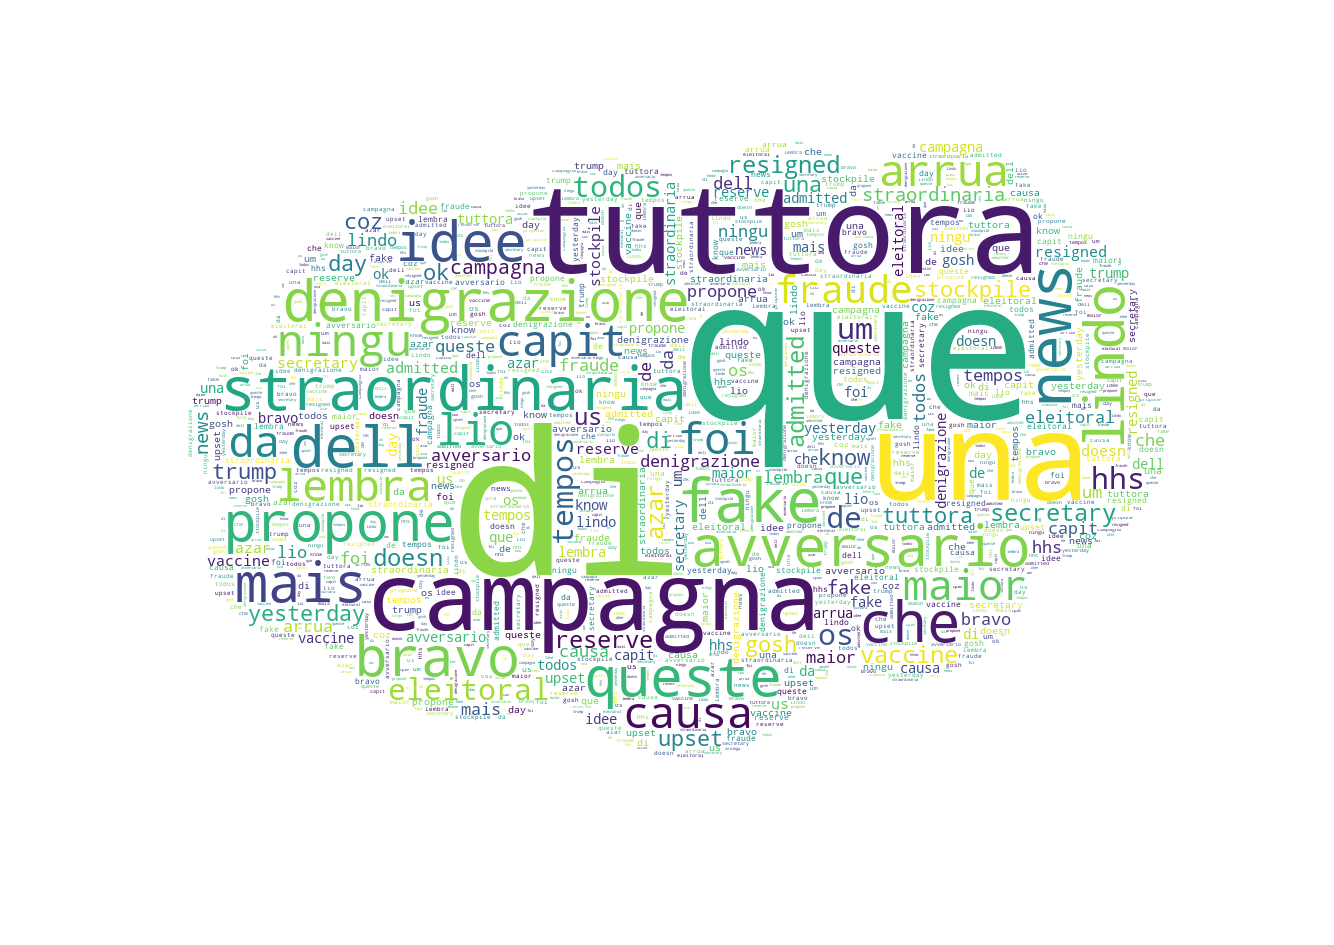

In [32]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [26]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [27]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,117.25
positive,110.67


In [28]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,21.50
positive,18.33


In [33]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [34]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [35]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [36]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [38]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) 
    # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    
    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  
    # remove stopwords and stemming
    return text

In [39]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @aaronjmate: @EmmaVigeland Jimmy called for...,jimmy called for pardoning julian assange o...,0.1875,0.4375,positive,0.000,0.856,0.144,0.4019,113,17,jimmy called for pardoning julian assange o...,"[, jimmy, called, for, pardoning, julian, assa...","[, jimmy, called, pardoning, julian, assange, ...","[, jimmi, call, pardon, julian, assang, networ..."
1,RT @RepMattGaetz: President Trump called for p...,president trump called for protests that woul...,0.2500,0.5000,positive,0.213,0.562,0.225,0.0772,123,19,president trump called for protests that woul...,"[, president, trump, called, for, protests, th...","[, president, trump, called, protests, would, ...","[, presid, trump, call, protest, would, peac, ..."
2,"RT @Paroledipaola: ""C'è tuttora una campagna s...",c tuttora una campagna straordinaria di fa...,-0.5000,1.0000,negative,0.171,0.829,0.000,-0.4767,121,18,c tuttora una campagna straordinaria di fa...,"[, c, tuttora, una, campagna, straordinaria, d...","[, c, tuttora, una, campagna, straordinaria, d...","[, c, tuttora, una, campagna, straordinaria, d..."
3,RT @ThePubliusUSA: Ivanka Trump and Jared Kush...,ivanka trump and jared kushner bought a 30 m...,0.2500,0.4375,positive,0.000,0.909,0.091,0.2006,121,21,ivanka trump and jared kushner bought a mil...,"[, ivanka, trump, and, jared, kushner, bought,...","[, ivanka, trump, jared, kushner, bought, mill...","[, ivanka, trump, jare, kushner, bought, milli..."
4,RT @CapitanBitcoin: Trump ha desclasificado an...,trump ha desclasificado antes de su asesinato...,0.0000,0.0000,positive,0.000,0.888,0.112,0.3400,121,21,trump ha desclasificado antes de su asesinato...,"[, trump, ha, desclasificado, antes, de, su, a...","[, trump, ha, desclasificado, antes, de, su, a...","[, trump, ha, desclasificado, ant, de, su, ase..."


In [40]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

10 Number of reviews has 120 words


In [41]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,admit,ant,approv,ar,arrua,asesinato,assang,avversario,azar,...,um,un,una,unemploy,upset,us,vaccin,watch,would,yesterday
0,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [42]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
trump,7
que,3
de,3
network,2
presid,2
call,2
c,2
di,2
un,1
protest,1


In [43]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [44]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('president trump', 2),
 ('jimmy called', 1),
 ('called pardoning', 1),
 ('pardoning julian', 1),
 ('julian assange', 1),
 ('assange network', 1),
 ('network trump', 1),
 ('trump watches', 1),
 ('watches networks', 1),
 ('networks ar', 1),
 ('trump called', 1),
 ('called protests', 1),
 ('protests peaceful', 1),
 ('peaceful patriotic', 1),
 ('patriotic got', 1),
 ('got labeled', 1),
 ('labeled national', 1),
 ('national security', 1),
 ('security threat', 1),
 ('tuttora una', 1)]

In [45]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('jimmy called pardoning', 1),
 ('called pardoning julian', 1),
 ('pardoning julian assange', 1),
 ('julian assange network', 1),
 ('assange network trump', 1),
 ('network trump watches', 1),
 ('trump watches networks', 1),
 ('watches networks ar', 1),
 ('president trump called', 1),
 ('trump called protests', 1),
 ('called protests peaceful', 1),
 ('protests peaceful patriotic', 1),
 ('peaceful patriotic got', 1),
 ('patriotic got labeled', 1),
 ('got labeled national', 1),
 ('labeled national security', 1),
 ('national security threat', 1),
 ('tuttora una campagna', 1),
 ('una campagna straordinaria', 1),
 ('campagna straordinaria di', 1)]